<a href="https://colab.research.google.com/github/krishnadesai03/The-Sparks-Foundation/blob/main/Task-1/Task1_Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Sparks Foundation

Predict the percentage of a student based on the no. of study hours using Supervised Machine Learning

### **Krishna Desai**

In [ ]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
# data connection and exploration
df = pd.read_csv('/content/Student_score.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

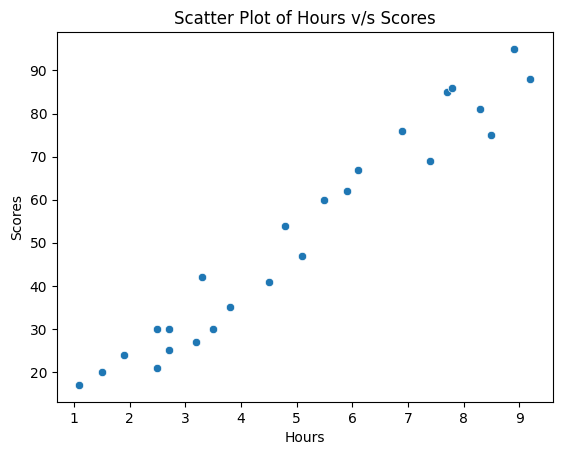

In [ ]:
# visualizing the data
plt.title("Scatter Plot of Hours v/s Scores")
sns.scatterplot(data=df, x='Hours',y='Scores')
plt.show()

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values

In [ ]:
# data split into train and test
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

In [ ]:
# training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercept    : ', model.intercept_)
# The coefficients
print('Coefficients : ', model.coef_[0])

Intercept    :  3.2294070341198733
Coefficients :  9.576926340972559


In [ ]:
l = model.coef_*X+model.intercept_

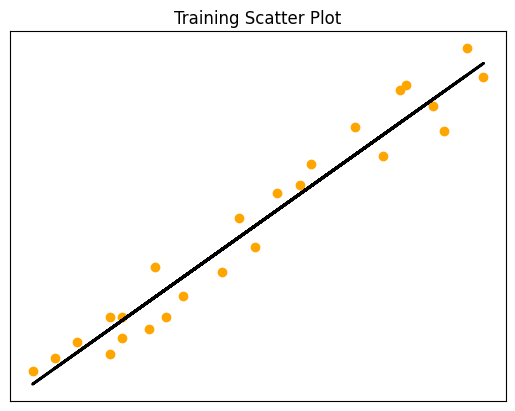

In [ ]:
plt.title("Training Scatter Plot")
plt.scatter(X, y,  color='orange')
plt.plot(X, l, color='black', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
y_pred = model.predict(X_test)
predictions = pd.DataFrame({'Hours':X_test.flatten(),'Actual_Score':y_test,'Predicted_Score':y_pred})
predictions

,Hours,Actual_Score,Predicted_Score
0,7.7,85,76.971740
1,2.5,30,27.171723
2,7.4,69,74.098662
3,2.5,21,27.171723
4,6.9,76,69.310199


In [ ]:
# model evaluation

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(X_test,y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(X_test, y_pred))

Mean squared error: 2871.94
Coefficient of determination: -505.34


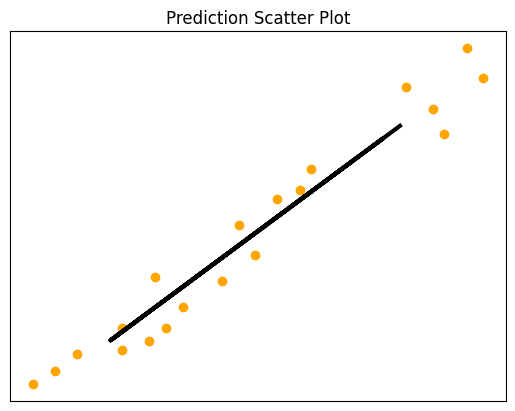

In [ ]:
# visualization of the prediction
plt.title("Prediction Scatter Plot")
plt.scatter(X_train, y_train,  color='orange')
plt.plot(X_test, y_pred, color='black', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
# Task Objective
value = np.array(9.25)
pred = model.predict(value.reshape(-1,1))
print('If you spend {} hrs/day then you will get your score = {}'.format(value,pred[0]))

If you spend 9.25 hrs/day then you will get your score = 91.81597568811604
